In [ ]:
#data
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
from detection_XAI.utils import utils
import cv2
from tensorflow.keras.models import load_model

x_cluster = io.loadmat('.data/x_cluster.mat')
x_cluster = x_cluster['x_cluster']

# labells
y_cluster = io.loadmat('.data/y_cluster.mat')
y_cluster = y_cluster['y_cluster']

#pre-processing
from keras.utils import to_categorical

y_cluster_n = to_categorical(y_cluster-1)
x_cluster_n = utils.norml(x_cluster)

x_cluster_stft = utils.batch_stft(x_cluster_n,nfft=128,overlap=0.7)

#reshape input to 64x64
def resize_stft(x_in):
  batch_num = x_in.shape[0]

  # Initialize an empty array to store resized images
  resized_input = np.zeros((batch_num, 64, 64, 3), dtype=np.float32)

  # Loop through each image in the batch and resize
  for i in range(batch_num):
      # Resize each image to (64, 64)
      resized_image = cv2.resize(x_in[i], (64, 64), interpolation=cv2.INTER_LINEAR)

      # Store the resized image in the new array
      resized_input[i] = resized_image


# Now 'resized_images' contains all the images resized to (64, 64, 3) with dtype float32
  return resized_input

resized_x = resize_stft(x_cluster_stft)

saved_encoder_model = load_model("./SSL/model/encoder_4x4x16_v2.h5")
encoded_features = saved_encoder_model.predict(resized_x)
reshaped_features = encoded_features.reshape(encoded_features.shape[0], -1)

43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


In [ ]:
import tensorflow as tf

def create_model(input_shape, dropout_rate=0.2, use_bn=False):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=input_shape))

    # Layer 1
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    if use_bn:
        model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(dropout_rate))

    # Layer 2
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    if use_bn:
        model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(dropout_rate))

    # Layer 3
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    if use_bn:
        model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(dropout_rate))

    # Output layer
    model.add(tf.keras.layers.Dense(4, activation='softmax'))

    # Compile
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# 6 models with different regularization setting
models = {
    "drop0.2_noBN":   create_model((256,), dropout_rate=0.2,  use_bn=False),
    "drop0.5_noBN":   create_model((256,), dropout_rate=0.5,  use_bn=False),
    "drop0.2_withBN": create_model((256,), dropout_rate=0.2,  use_bn=True),
    "drop0.5_withBN": create_model((256,), dropout_rate=0.5,  use_bn=True),
    "drop0.35_noBN":  create_model((256,), dropout_rate=0.35, use_bn=False),
    "drop0.35_withBN":create_model((256,), dropout_rate=0.35, use_bn=True),
}

# print model structure
for name, m in models.items():
    print(f"\n{name} summary:")
    m.summary()



drop0.2_noBN summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,364 (169.39 KB)

 Trainable params: 43,364 (169.39 KB)

 Non-trainable params: 0 (0.00 B)


drop0.5_noBN summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,364 (169.39 KB)

 Trainable params: 43,364 (169.39 KB)

 Non-trainable params: 0 (0.00 B)


drop0.2_withBN summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,260 (172.89 KB)

 Trainable params: 43,812 (171.14 KB)

 Non-trainable params: 448 (1.75 KB)


drop0.5_withBN summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,260 (172.89 KB)

 Trainable params: 43,812 (171.14 KB)

 Non-trainable params: 448 (1.75 KB)


drop0.35_noBN summary:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,364 (169.39 KB)

 Trainable params: 43,364 (169.39 KB)

 Non-trainable params: 0 (0.00 B)


drop0.35_withBN summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,260 (172.89 KB)

 Trainable params: 43,812 (171.14 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

def resultshow(classes,label):
  lis=np.zeros(classes.shape[0])
  for i in range(classes.shape[0]):
   jeg = np.where(classes[i,:] == max(classes[i,:]))
   lis[i] = jeg[0]

  tru=np.zeros(classes.shape[0])
  for i in range(classes.shape[0]):
    jeg2 = np.where(label[i,:] == max(label[i,:]))
    tru[i] = jeg2[0]

  target = ['quake','earthquake','rockfall','enviroemnt noise']
  print(classification_report(tru, lis, target_names=target))
  print(confusion_matrix(tru, lis))
  confusion_matrices = (confusion_matrix(tru, lis))
  precision, recall, f1, support = precision_recall_fscore_support(tru, lis)
  return confusion_matrices, precision, recall, f1


Running drop0.2_noBN with 3-fold ...


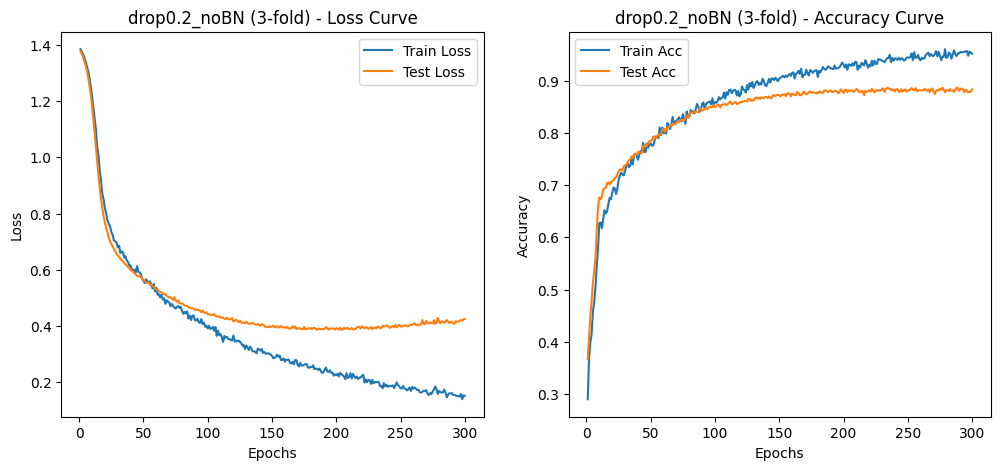


Running drop0.2_noBN with 5-fold ...


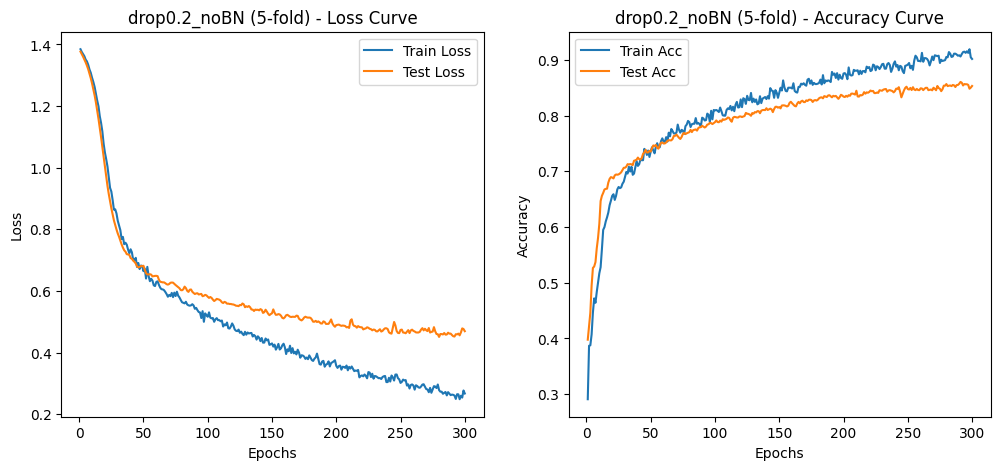


Running drop0.2_noBN with 10-fold ...


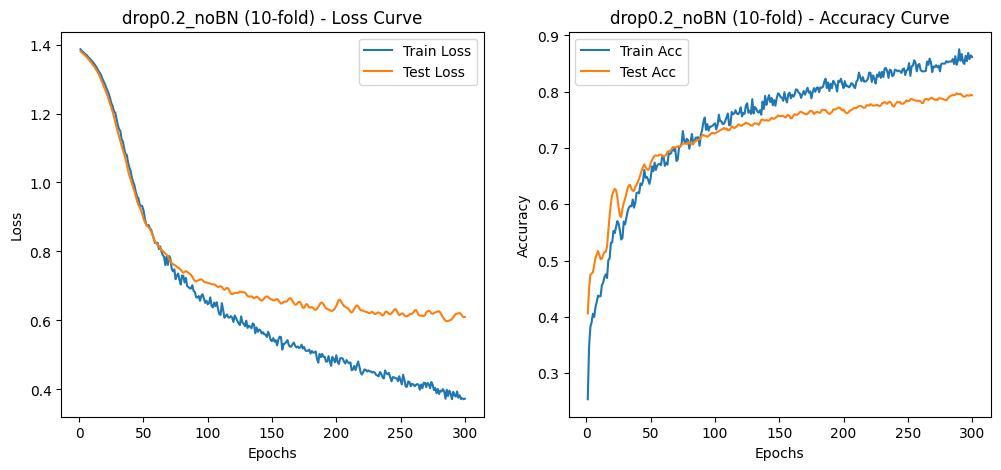


Running drop0.2_noBN with 20-fold ...


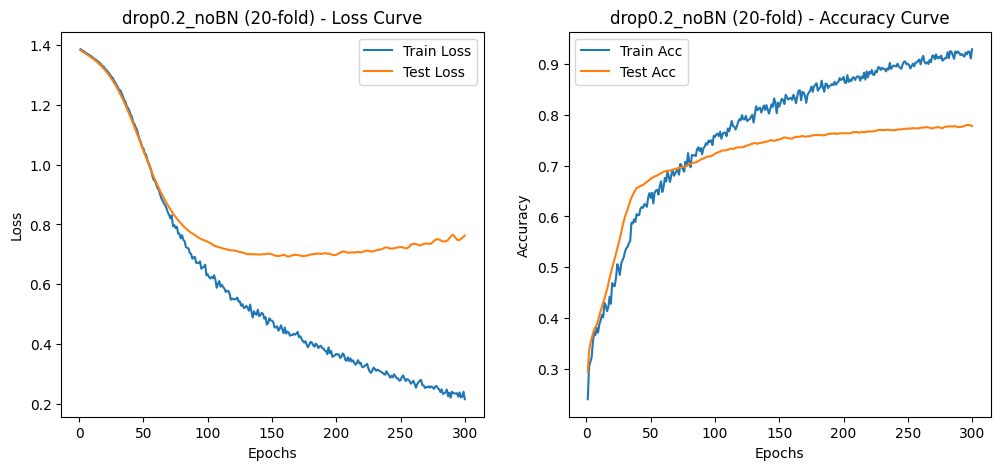


Running drop0.5_noBN with 3-fold ...


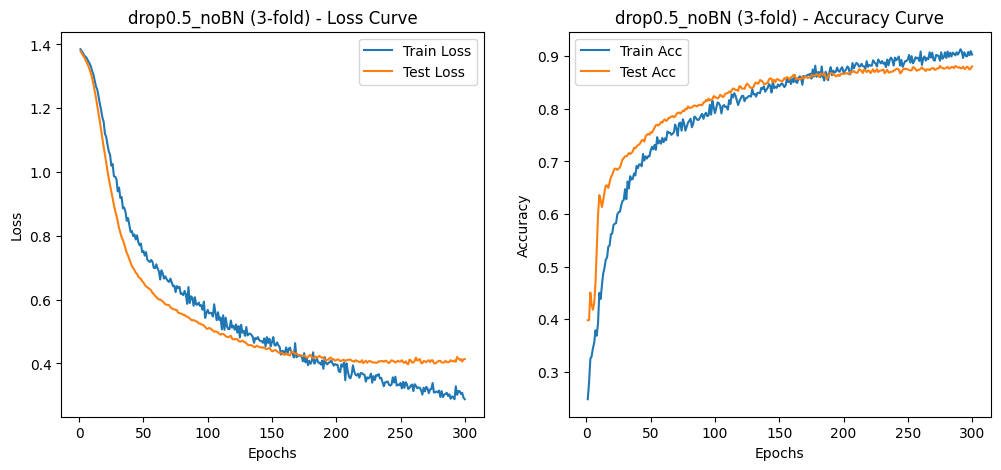


Running drop0.5_noBN with 5-fold ...


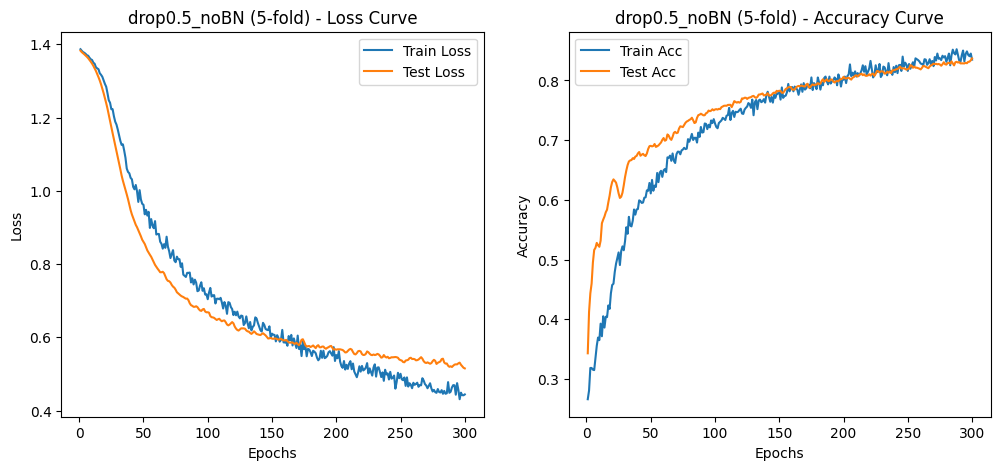


Running drop0.5_noBN with 10-fold ...


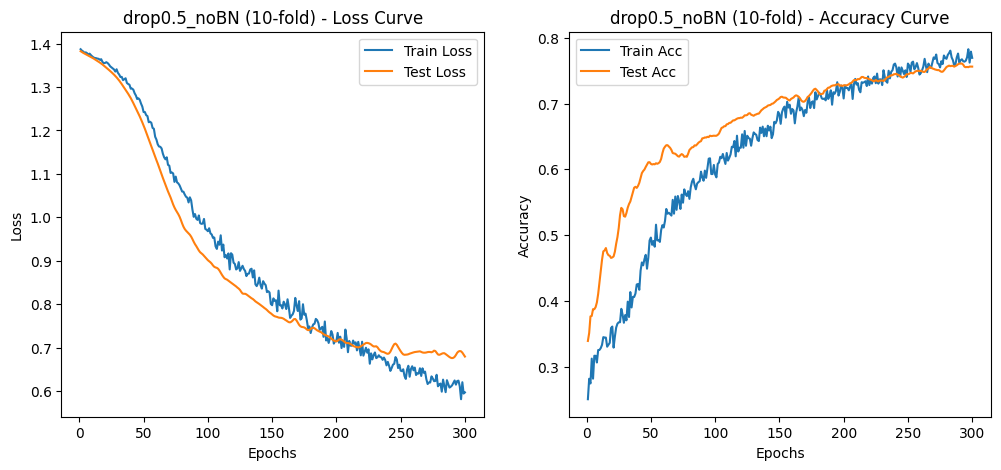


Running drop0.5_noBN with 20-fold ...


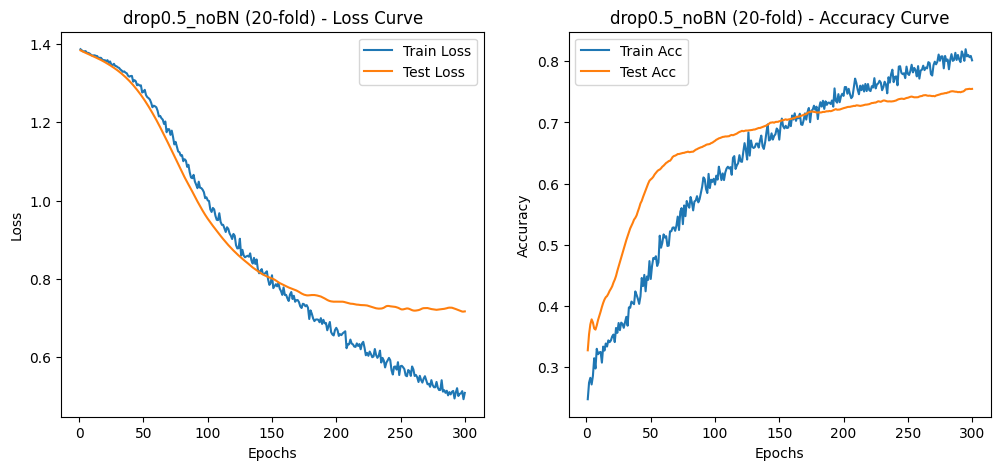


Running drop0.2_withBN with 3-fold ...


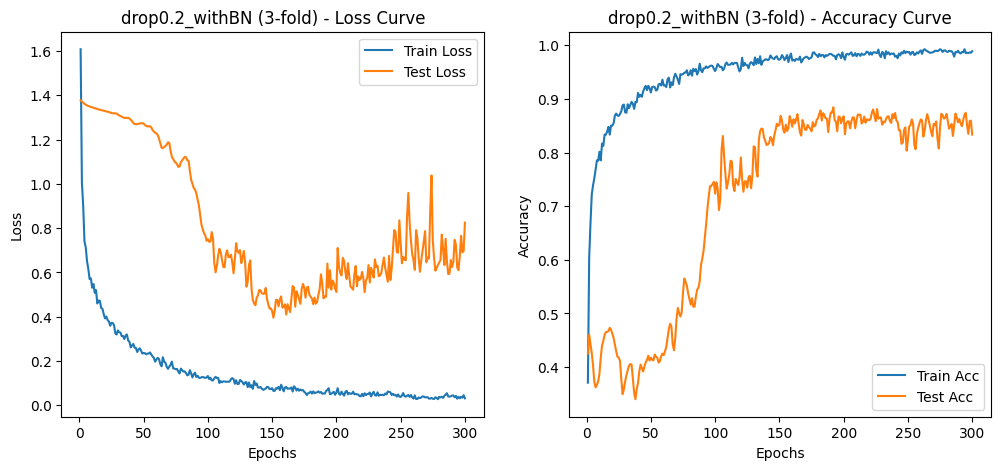


Running drop0.2_withBN with 5-fold ...


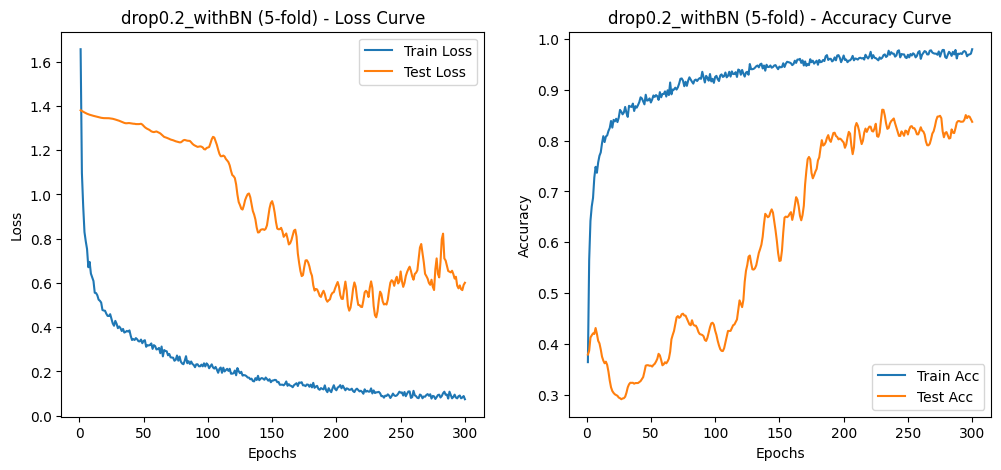


Running drop0.2_withBN with 10-fold ...


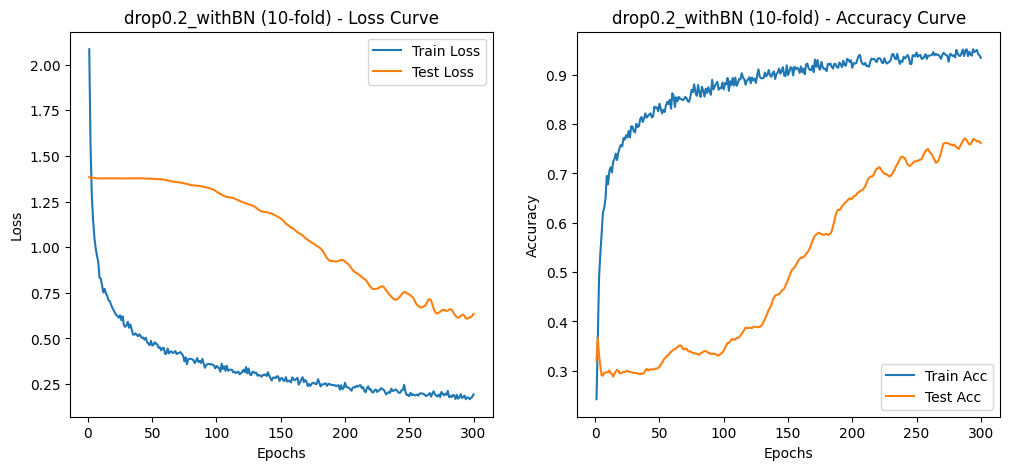


Running drop0.2_withBN with 20-fold ...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

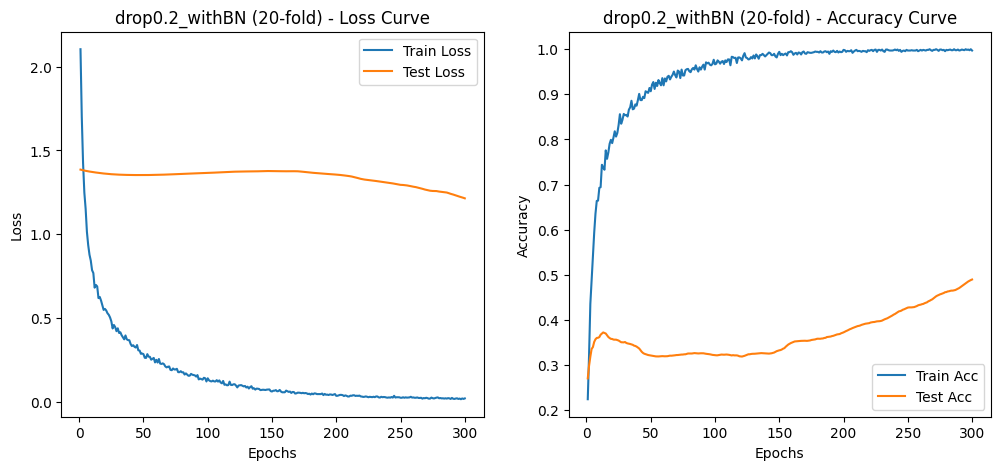


Running drop0.5_withBN with 3-fold ...


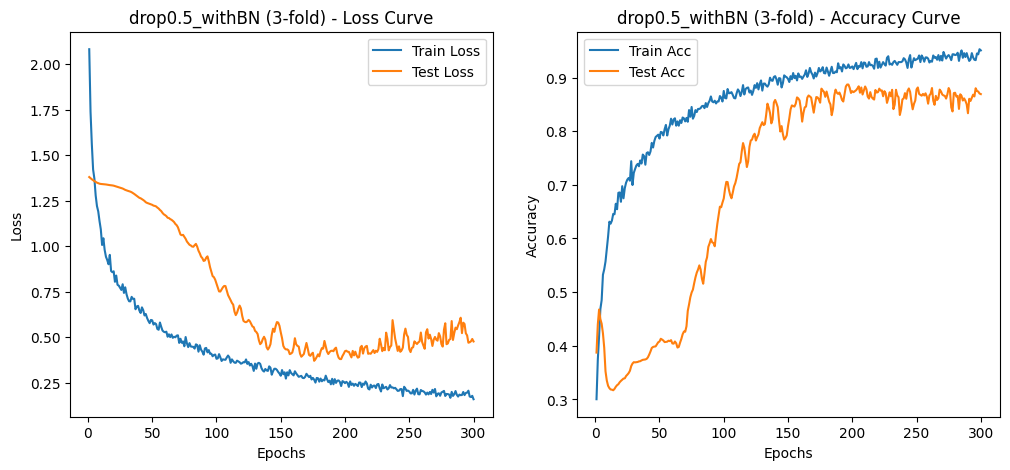


Running drop0.5_withBN with 5-fold ...


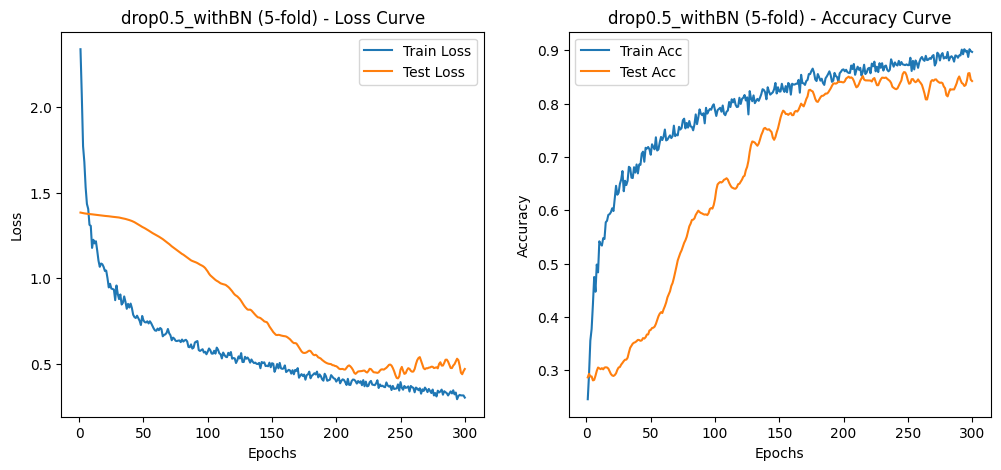


Running drop0.5_withBN with 10-fold ...


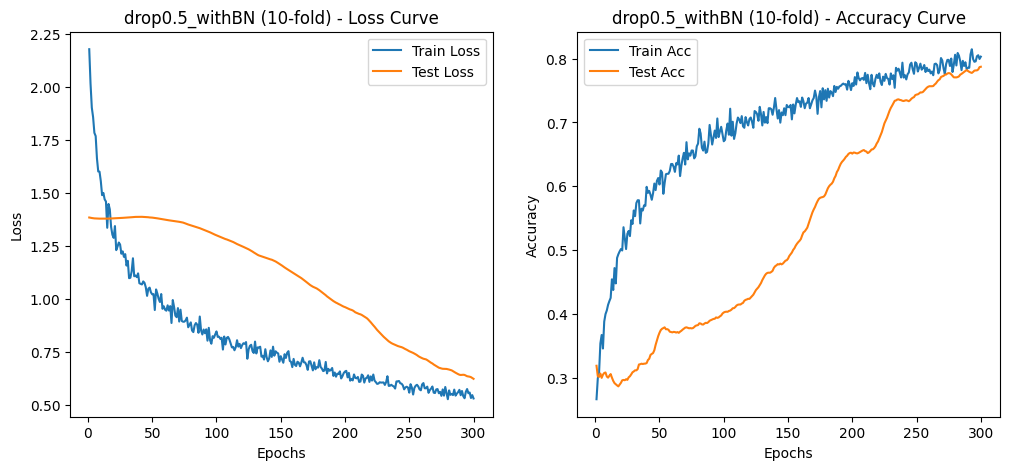


Running drop0.5_withBN with 20-fold ...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

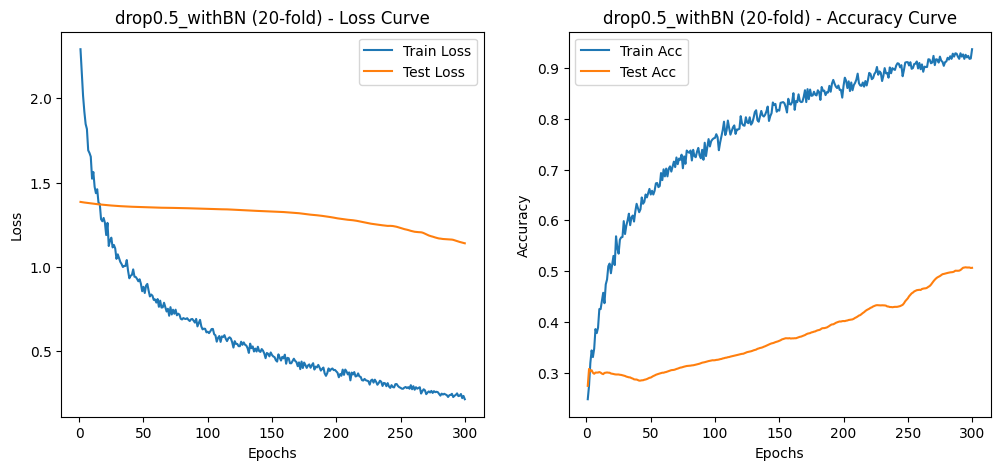


Running drop0.35_noBN with 3-fold ...


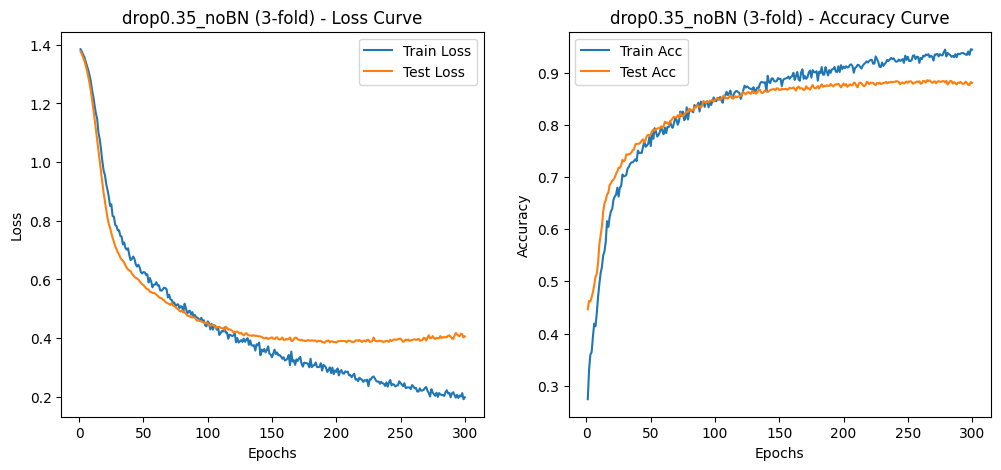


Running drop0.35_noBN with 5-fold ...


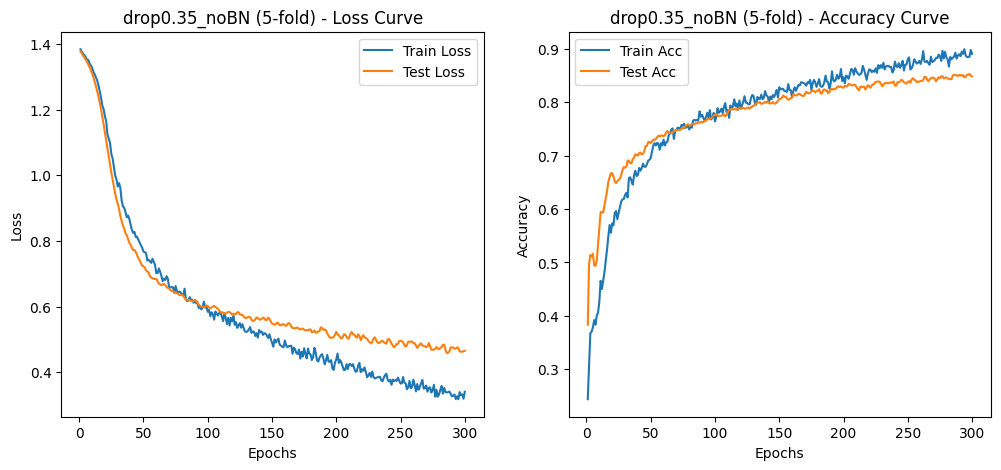


Running drop0.35_noBN with 10-fold ...


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical


def evaluate_model_with_kfold(model_fn, data, labels, n_splits=5, epochs=80, batch_size=128):
    """cross validation from each model and return metrics and loss"""
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    accuracy_list = []
    precision_dicts = {c: [] for c in class_names}
    recall_dicts   = {c: [] for c in class_names}
    f1_dicts       = {c: [] for c in class_names}

    history_per_fold = []

    for train_index, test_index in kfold.split(data, labels):
        X_train, X_test = data[test_index], data[train_index]
        y_train, y_test = labels[test_index], labels[train_index]

        y_train_one_hot = to_categorical(y_train - 1)
        y_test_one_hot  = to_categorical(y_test - 1)

        model = model_fn()
        history = model.fit(X_train, y_train_one_hot,
                            validation_data=(X_test, y_test_one_hot),
                            epochs=epochs, batch_size=batch_size,
                            verbose=0)
        history_per_fold.append(history)

        # results
        preds = model.predict(X_test, verbose=0)
        y_pred = np.argmax(preds, axis=1)
        y_true = np.argmax(y_test_one_hot, axis=1)

        # precision/recall/f1
        from sklearn.metrics import precision_recall_fscore_support, accuracy_score
        precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None)

        for i, c in enumerate(class_names):
            precision_dicts[c].append(precision[i])
            recall_dicts[c].append(recall[i])
            f1_dicts[c].append(f1[i])

        accuracy_list.append(accuracy_score(y_true, y_pred))

    # sum
    metrics_summary = {
        "accuracy_mean": np.mean(accuracy_list),
        "accuracy_std":  np.std(accuracy_list),
    }
    for c in class_names:
        metrics_summary[f"{c}_precision_mean"] = np.mean(precision_dicts[c])
        metrics_summary[f"{c}_precision_std"]  = np.std(precision_dicts[c])
        metrics_summary[f"{c}_recall_mean"]    = np.mean(recall_dicts[c])
        metrics_summary[f"{c}_recall_std"]     = np.std(recall_dicts[c])
        metrics_summary[f"{c}_f1_mean"]        = np.mean(f1_dicts[c])
        metrics_summary[f"{c}_f1_std"]         = np.std(f1_dicts[c])

    return metrics_summary, history_per_fold


def plot_history(histories, title):
    """draw curves for each model with average of each fold"""
    # all folds' loss/acc
    train_loss = np.mean([h.history['loss'] for h in histories], axis=0)
    val_loss   = np.mean([h.history['val_loss'] for h in histories], axis=0)
    train_acc  = np.mean([h.history['accuracy'] for h in histories], axis=0)
    val_acc    = np.mean([h.history['val_accuracy'] for h in histories], axis=0)

    epochs = range(1, len(train_loss)+1)

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(epochs, train_loss, label="Train Loss")
    plt.plot(epochs, val_loss, label="Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{title} - Loss Curve")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, train_acc, label="Train Acc")
    plt.plot(epochs, val_acc, label="Test Acc")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title(f"{title} - Accuracy Curve")
    plt.legend()

    plt.show()


# ===== Main process =====
folds = [3, 5, 10, 20]
all_results = []
data = reshaped_features
labels = y_cluster.flatten()
class_names = ['quake', 'earthquake', 'rockfall', 'noise']
precision_dicts = {class_name: [] for class_name in class_names}
recall_dicts = {class_name: [] for class_name in class_names}
f1_dicts = {class_name: [] for class_name in class_names}
confusion_matrices_list = []
accuracy_list = []

for model_name, model_fn in models.items():
    for k in folds:
        print(f"\nRunning {model_name} with {k}-fold ...")
        metrics_summary, histories = evaluate_model_with_kfold(
            lambda: create_model((256,),
                                 dropout_rate=float(model_name.split("_")[0].replace("drop","")),
                                 use_bn="withBN" in model_name),
            data, labels,
            n_splits=k, epochs=300, batch_size=128
        )
        metrics_summary["model"] = model_name
        metrics_summary["folds"] = k
        all_results.append(metrics_summary)

        # draw final curves
        plot_history(histories, f"{model_name} ({k}-fold)")

# To DataFrame
df_results = pd.DataFrame(all_results)
print("\n===== Summary Results =====")
print(df_results)

# Metrics to CSV
df_results.to_csv("kfold_results_summary.csv", index=False)


In [ ]:
import tensorflow as tf

def create_model(input_shape, dropout_rate=0.2, use_bn=False):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=input_shape))

    # Layer 1
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    if use_bn:
        model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(dropout_rate))

    # Layer 2
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    if use_bn:
        model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(dropout_rate))

    # Layer 3
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    if use_bn:
        model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(dropout_rate))

    # Output layer
    model.add(tf.keras.layers.Dense(4, activation='softmax'))

    # Compile
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

models = {
    "drop0.35_noBN":  create_model((256,), dropout_rate=0.35, use_bn=False),
    "drop0.35_withBN":create_model((256,), dropout_rate=0.35, use_bn=True),
}

for name, m in models.items():
    print(f"\n{name} summary:")
    m.summary()



drop0.35_noBN summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,364 (169.39 KB)

 Trainable params: 43,364 (169.39 KB)

 Non-trainable params: 0 (0.00 B)


drop0.35_withBN summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,260 (172.89 KB)

 Trainable params: 43,812 (171.14 KB)

 Non-trainable params: 448 (1.75 KB)


Running drop0.35_noBN with 10-fold ...


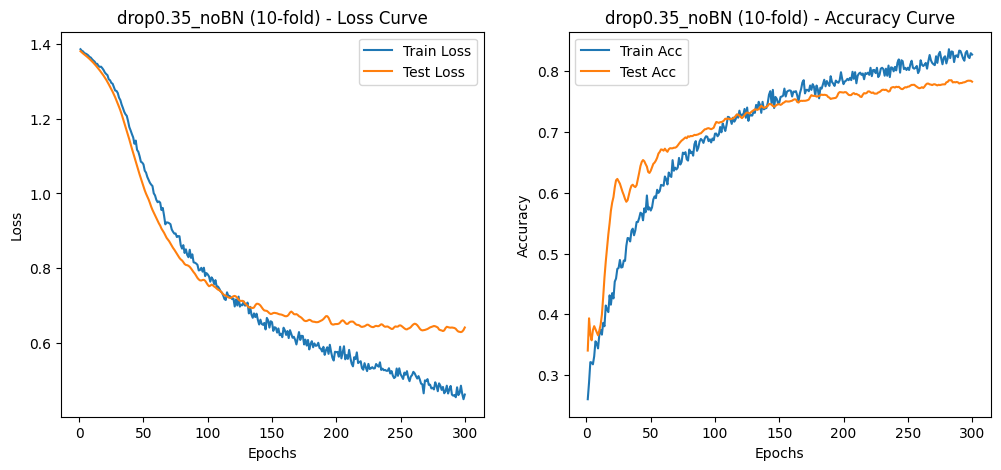


Running drop0.35_noBN with 20-fold ...


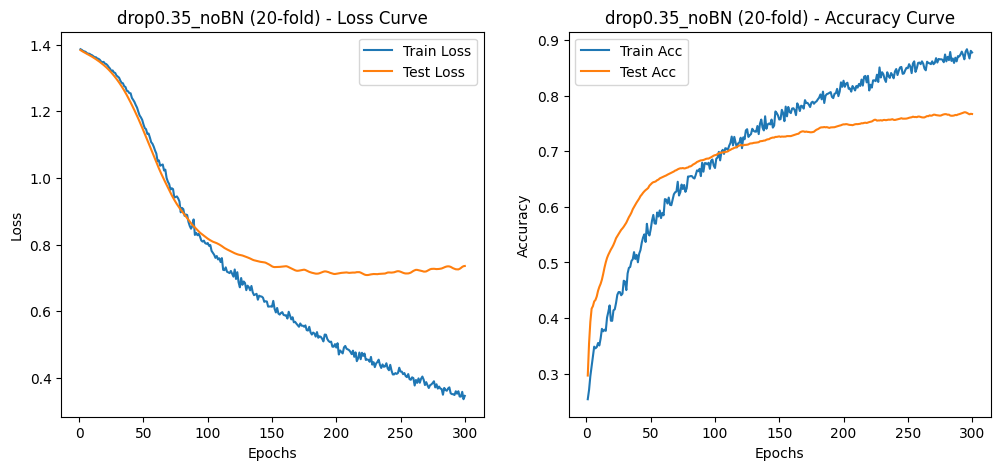


Running drop0.35_withBN with 10-fold ...


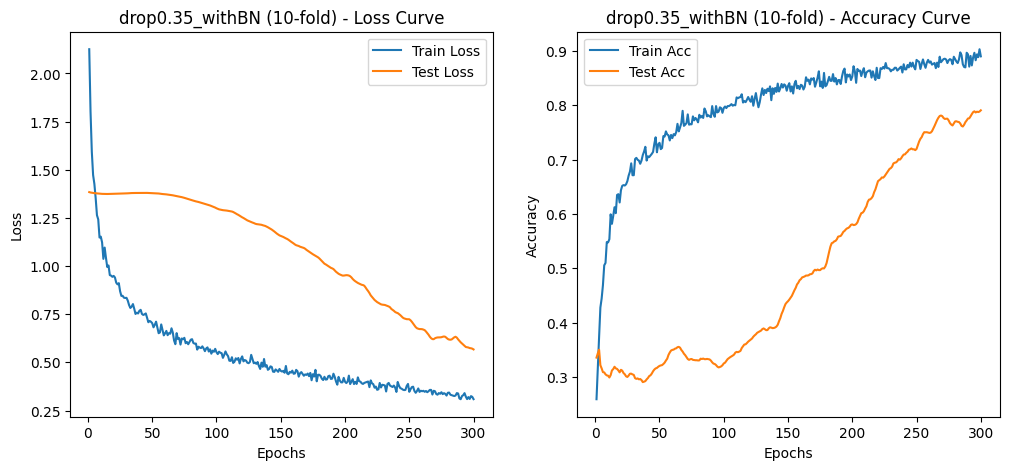


Running drop0.35_withBN with 20-fold ...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

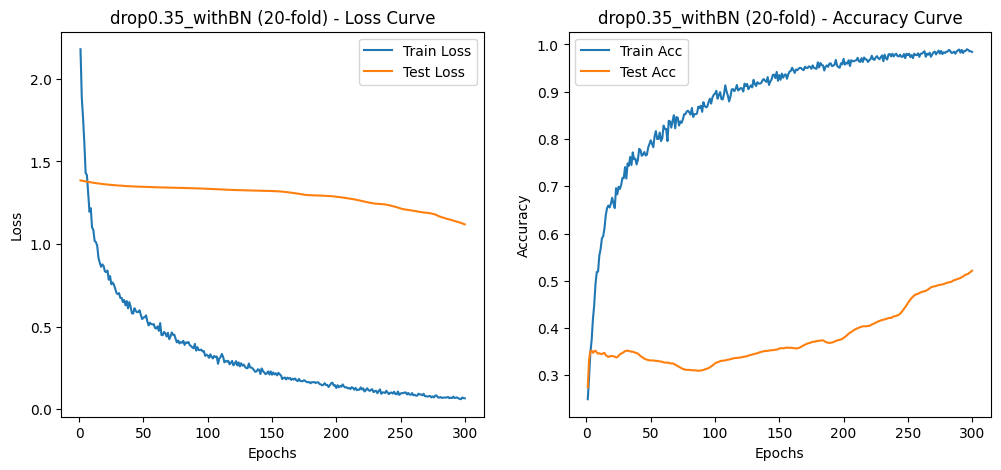


===== Summary Results =====
   accuracy_mean  accuracy_std  quake_precision_mean  quake_precision_std  \
0       0.782952      0.014350              0.641310             0.060516   
1       0.767044      0.022829              0.563826             0.068138   
2       0.790794      0.045486              0.730645             0.146641   
3       0.521226      0.128881              0.306188             0.276244   

   quake_recall_mean  quake_recall_std  quake_f1_mean  quake_f1_std  \
0           0.470072          0.103061       0.533999      0.064896   
1           0.483010          0.109121       0.513405      0.072441   
2           0.561262          0.193388       0.587092      0.117680   
3           0.350287          0.378096       0.260034      0.258876   

   earthquake_precision_mean  earthquake_precision_std  ...  rockfall_f1_mean  \
0                   0.795895                  0.060736  ...          0.883360   
1                   0.794748                  0.053966  ...        

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical



def evaluate_model_with_kfold(model_fn, data, labels, n_splits=5, epochs=80, batch_size=128):
    """cross validation from each model and return metrics and loss"""
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    accuracy_list = []
    precision_dicts = {c: [] for c in class_names}
    recall_dicts   = {c: [] for c in class_names}
    f1_dicts       = {c: [] for c in class_names}

    history_per_fold = []

    for train_index, test_index in kfold.split(data, labels):
        X_train, X_test = data[test_index], data[train_index]
        y_train, y_test = labels[test_index], labels[train_index]

        y_train_one_hot = to_categorical(y_train - 1)
        y_test_one_hot  = to_categorical(y_test - 1)

        model = model_fn()
        history = model.fit(X_train, y_train_one_hot,
                            validation_data=(X_test, y_test_one_hot),
                            epochs=epochs, batch_size=batch_size,
                            verbose=0)
        history_per_fold.append(history)

        # results
        preds = model.predict(X_test, verbose=0)
        y_pred = np.argmax(preds, axis=1)
        y_true = np.argmax(y_test_one_hot, axis=1)

        # precision/recall/f1
        from sklearn.metrics import precision_recall_fscore_support, accuracy_score
        precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None)

        for i, c in enumerate(class_names):
            precision_dicts[c].append(precision[i])
            recall_dicts[c].append(recall[i])
            f1_dicts[c].append(f1[i])

        accuracy_list.append(accuracy_score(y_true, y_pred))

    # sum
    metrics_summary = {
        "accuracy_mean": np.mean(accuracy_list),
        "accuracy_std":  np.std(accuracy_list),
    }
    for c in class_names:
        metrics_summary[f"{c}_precision_mean"] = np.mean(precision_dicts[c])
        metrics_summary[f"{c}_precision_std"]  = np.std(precision_dicts[c])
        metrics_summary[f"{c}_recall_mean"]    = np.mean(recall_dicts[c])
        metrics_summary[f"{c}_recall_std"]     = np.std(recall_dicts[c])
        metrics_summary[f"{c}_f1_mean"]        = np.mean(f1_dicts[c])
        metrics_summary[f"{c}_f1_std"]         = np.std(f1_dicts[c])

    return metrics_summary, history_per_fold


def plot_history(histories, title):
    """draw curves for each model with average of each fold"""
    # all folds' loss/acc
    train_loss = np.mean([h.history['loss'] for h in histories], axis=0)
    val_loss   = np.mean([h.history['val_loss'] for h in histories], axis=0)
    train_acc  = np.mean([h.history['accuracy'] for h in histories], axis=0)
    val_acc    = np.mean([h.history['val_accuracy'] for h in histories], axis=0)

    epochs = range(1, len(train_loss)+1)

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(epochs, train_loss, label="Train Loss")
    plt.plot(epochs, val_loss, label="Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{title} - Loss Curve")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, train_acc, label="Train Acc")
    plt.plot(epochs, val_acc, label="Test Acc")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title(f"{title} - Accuracy Curve")
    plt.legend()

    plt.show()


# ===== Main process =====
folds = [10, 20]
all_results = []
data = reshaped_features
labels = y_cluster.flatten()
class_names = ['quake', 'earthquake', 'rockfall', 'noise']
precision_dicts = {class_name: [] for class_name in class_names}
recall_dicts = {class_name: [] for class_name in class_names}
f1_dicts = {class_name: [] for class_name in class_names}
confusion_matrices_list = []
accuracy_list = []

for model_name, model_fn in models.items():
    for k in folds:
        print(f"\nRunning {model_name} with {k}-fold ...")
        metrics_summary, histories = evaluate_model_with_kfold(
            lambda: create_model((256,),
                                 dropout_rate=float(model_name.split("_")[0].replace("drop","")),
                                 use_bn="withBN" in model_name),
            data, labels,
            n_splits=k, epochs=300, batch_size=128
        )
        metrics_summary["model"] = model_name
        metrics_summary["folds"] = k
        all_results.append(metrics_summary)

        # draw final curves
        plot_history(histories, f"{model_name} ({k}-fold)")

# To DataFrame
df_results = pd.DataFrame(all_results)
print("\n===== Summary Results =====")
print(df_results)

# Metrics to CSV
df_results.to_csv("kfold_results_summary.csv", index=False)